# Textmining

---

Group name: D

---


In [35]:
import pandas as pd 

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [37]:
df=pd.read_csv("https://raw.githubusercontent.com/jakobdesantis/homework-1/30b57b1960583a73480779ac302afd3ea5fccb1c/data/raw/webscraping.csv")
#df = pd.read_csv("~/Documents/GitHub/homework-1/data/raw/webscraping.csv")

In [38]:
df

,Unnamed: 0,Text,Title
0,0,"When Roswell Schaeffer Sr. was 8 years old, hi...",The Mystery of Alaska’s Disappearing Whales | ...


In [39]:
df['Text'] = df['Text'].astype(str).str.lower()
df['Title'] = df['Title'].astype(str).str.lower()

df.head()

,Unnamed: 0,Text,Title
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...


In [40]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['Text_Token']=df['Text'].apply(regexp.tokenize)
df['Title_Token']=df['Title'].apply(regexp.tokenize)

df.head()

,Unnamed: 0,Text,Title,Text_Token,Title_Token
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...,"[when, roswell, schaeffer, sr, was, 8, years, ...","[the, mystery, of, alaska, s, disappearing, wh..."


In [41]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords

In [43]:
my_stopwords = ['wired', 'but', 'the', 'and', 'that', 'are', 'they', 'said', 'for', 'from', 'when', 'with', 'have', 'their', 'some', 'like', 'not', 'one', 'other', 'can', 'out']

my_stopwords

['wired',
 'but',
 'the',
 'and',
 'that',
 'are',
 'they',
 'said',
 'for',
 'from',
 'when',
 'with',
 'have',
 'their',
 'some',
 'like',
 'not',
 'one',
 'other',
 'can',
 'out']

In [44]:
df['Text_Token_1'] = df['Text_Token'].apply(lambda x: [i for i in x if i not in my_stopwords])
df['Title_Token_1'] = df['Title_Token'].apply(lambda x: [i for i in x if i not in my_stopwords])

df.head()

,Unnamed: 0,Text,Title,Text_Token,Title_Token,Text_Token_1,Title_Token_1
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...,"[when, roswell, schaeffer, sr, was, 8, years, ...","[the, mystery, of, alaska, s, disappearing, wh...","[roswell, schaeffer, sr, was, 8, years, old, h...","[mystery, of, alaska, s, disappearing, whales]"


In [45]:
df['Text_Token_2'] = df['Text_Token_1'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))
df['Title_Token_2'] = df['Title_Token_1'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

df.head()

,Unnamed: 0,Text,Title,Text_Token,Title_Token,Text_Token_1,Title_Token_1,Text_Token_2,Title_Token_2
0,0,"when roswell schaeffer sr. was 8 years old, hi...",the mystery of alaska’s disappearing whales | ...,"[when, roswell, schaeffer, sr, was, 8, years, ...","[the, mystery, of, alaska, s, disappearing, wh...","[roswell, schaeffer, sr, was, 8, years, old, h...","[mystery, of, alaska, s, disappearing, whales]",roswell schaeffer was years old his father dec...,mystery alaska disappearing whales


In [46]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthias/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/matthias/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [47]:
from nltk.stem import WordNetLemmatizer

In [48]:
wordnet_lem = WordNetLemmatizer()

In [49]:
df['Text_lem'] = df['Text_Token_2'].apply(wordnet_lem.lemmatize)
df['Title_lem'] = df['Title_Token_2'].apply(wordnet_lem.lemmatize)

In [50]:
check_difference = (df['Text_lem'] == df['Text_Token_2'])
check_difference.value_counts()

True    1
dtype: int64

In [51]:
check_difference = (df['Title_lem'] == df['Title_Token_2'])
check_difference.value_counts()

True    1
dtype: int64

In [52]:
all_words_articletext = ' '.join([i for i in df['Text_lem']])

In [53]:
all_words_articletitle = ' '.join([i for i in df['Title_lem']])

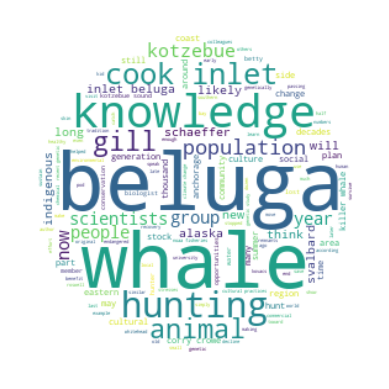

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import numpy as np
x, y = np.ogrid[:300, :300]
mask = (x - 150) **2 + (y - 150) **2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_articletext)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

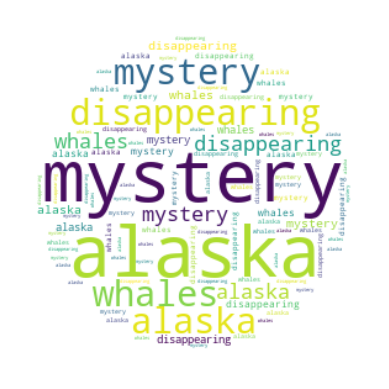

In [55]:
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_articletitle)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

Ab hier nur noch mit dem Text weitergemacht, da der Titel eine sehr überschaubare Anzahl an Wörtern hat. Kein Wort kommt doppelt vor, das Interessante ist der Artikeltext.

In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/matthias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [58]:
words_tokens = nltk.word_tokenize(all_words_articletext)

In [59]:
fd = FreqDist(words_tokens)
fd

FreqDist({'belugas': 43, 'whales': 24, 'beluga': 15, 'knowledge': 14, 'kotzebue': 13, 'hunting': 13, 'inlet': 13, 'cook': 12, 'gill': 11, 'scientists': 9, ...})

In [60]:
top_4 = fd.most_common(n=4)
top_4

[('belugas', 43), ('whales', 24), ('beluga', 15), ('knowledge', 14)]

In [61]:
fd.tabulate(4)

  belugas    whales    beluga knowledge 
       43        24        15        14 


In [62]:
top_10 = fd.most_common(10)

top_10

[('belugas', 43),
 ('whales', 24),
 ('beluga', 15),
 ('knowledge', 14),
 ('kotzebue', 13),
 ('hunting', 13),
 ('inlet', 13),
 ('cook', 12),
 ('gill', 11),
 ('scientists', 9)]

In [63]:
df_frequence = pd.DataFrame({"frequency": dict(top_10)})

df_frequence

,frequency
beluga,15
belugas,43
cook,12
gill,11
hunting,13
inlet,13
knowledge,14
kotzebue,13
scientists,9
whales,24


In [64]:
df_frequence.reset_index(inplace=True)

df_frequence

,index,frequency
0,beluga,15
1,belugas,43
2,cook,12
3,gill,11
4,hunting,13
5,inlet,13
6,knowledge,14
7,kotzebue,13
8,scientists,9
9,whales,24


In [68]:
import altair as alt 
alt.Chart(df_frequence).mark_bar().encode(
    x = alt.X("frequency", title="Anzahl"),
    y = alt.Y("index", sort = "-x", title="Wort")
)

alt.Chart(...)

In [66]:
fd["belugas"]

43

In [67]:
df.to_csv("~/Documents/GitHub/homework-1/data/processed/textmining-clean.csv")

OSError: Cannot save file into a non-existent directory: '/Users/matthias/Documents/GitHub/homework-1/data/processed'